# Pandas
## Las Series

In [2]:
import pandas as pd
#pd.Series?

In [3]:
animales = ['Tigre', 'Oso', 'Alce']
pd.Series(animales)

0    Tigre
1      Oso
2     Alce
dtype: object

In [4]:
animales = ['Tigre', 'Oso', None]
pd.Series(animales)

0    Tigre
1      Oso
2     None
dtype: object

In [5]:
numbers = [1, 2, None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

In [6]:
import numpy as np
np.nan == None

False

In [7]:
np.nan == np.nan

False

In [8]:
np.isnan(np.nan)

True

In [9]:
sports = {'Futbol': 'Ecuador',
          'Golf': 'Escocia',
          'Sumo': 'Japon',
          'Taekwondo': 'Corea del Sur'}
s = pd.Series(sports)
s

Futbol             Ecuador
Golf               Escocia
Sumo                 Japon
Taekwondo    Corea del Sur
dtype: object

In [10]:
s.index

Index(['Futbol', 'Golf', 'Sumo', 'Taekwondo'], dtype='object')

In [11]:
s = pd.Series(['Tigre', 'Oso', 'Alce'], index=['India', 'America', 'Canada'])
s

India      Tigre
America      Oso
Canada      Alce
dtype: object

In [12]:
sports = {'Futbol': 'Ecuador',
          'Golf': 'Escocia',
          'Sumo': 'Japon',
          'Taekwondo': 'Corea del Sur'}
s = pd.Series(sports, index=['Golf', 'Sumo', 'Hockey'])
s

Golf      Escocia
Sumo        Japon
Hockey        NaN
dtype: object

## Haciendo consultas en Series

In [13]:
sports = {'Futbol': 'Ecuador',
          'Golf': 'Escocia',
          'Sumo': 'Japon',
          'Taekwondo': 'Corea del Sur'}
s = pd.Series(sports)
s

Futbol             Ecuador
Golf               Escocia
Sumo                 Japon
Taekwondo    Corea del Sur
dtype: object

In [14]:
s.iloc[3]

'Corea del Sur'

In [15]:
s.loc['Golf']

'Escocia'

In [16]:
s[3]

'Corea del Sur'

In [17]:
s['Golf']

'Escocia'

In [18]:
sports = {99: 'Ecuador',
          100: 'Escocia',
          101: 'Japon',
          102: 'Corea del Sur'}
s = pd.Series(sports)

In [19]:
#  s[0] # no se hace la consulta

In [20]:
s = pd.Series([100.00, 120.00, 101.00, 3.00])
s

0    100.0
1    120.0
2    101.0
3      3.0
dtype: float64

In [21]:
total = 0
for item in s:
    total+=item
print(total)

324.0


In [22]:
s = pd.Series([1, 2, 3])
s.loc['Animal'] = 'Bears' # agregamos un elemento a la serie
s

0             1
1             2
2             3
Animal    Bears
dtype: object

## Pandas: estructuras de datos para estadística

Provee estructuras de datos adecuados para análisis estadístico, y añade funciones que  facilitan el ingreso de datos, su organización y su manipulación.

### Manipulación de datos

**Procedimientos comunes**

Un *DataFrame* es una estructura de datos de dos dimensiones con etiquetas cuyas columnas pueden ser de diferentes tipos. 

Empecemos creando un DataFrame con tres columnas *Time*, *x* y *y*

In [122]:
import numpy as np
import pandas as pd


In [123]:
t = np.arange(0,10,0.1)
x = np.sin(t)
y = np.cos(t)

In [124]:
df = pd.DataFrame({'Time':t, 'x':x,'y':y})

En *pandas* las filas se referencian por índices y las columnas por nombres. Si si desea la primera columna se tiene dos opciones:

In [125]:
df.Time
df['Time']

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
     ... 
95    9.5
96    9.6
97    9.7
98    9.8
99    9.9
Name: Time, Length: 100, dtype: float64

Si se desea extraer más de una columna, se lo hace con una lista:

In [126]:
data = df[['Time','x']]

Para despleguar las primeras o últimas filas tenemos:

In [127]:
data.head()
data.tail()

,Time,x
95,9.5,-0.075151
96,9.6,-0.174327
97,9.7,-0.271761
98,9.8,-0.366479
99,9.9,-0.457536


Para extraer las filas de la 5 a la 10 tenemos:

In [128]:
data[4:10]

,Time,x
4,0.4,0.389418
5,0.5,0.479426
6,0.6,0.564642
7,0.7,0.644218
8,0.8,0.717356
9,0.9,0.783327


El manejo de *DataFrames* es un tanto diferente de arrays en *numpy*. Por ejemplo, filas (enumeradas) y columnas (etiquetadas) se acceden de forma simultánea de la siguiente manera:

In [129]:
df[['Time','y']][4:10]

,Time,y
4,0.4,0.921061
5,0.5,0.877583
6,0.6,0.825336
7,0.7,0.764842
8,0.8,0.696707
9,0.9,0.621610


También se puede usar la manera estándar de fila/columna usando `iloc`:

In [130]:
df.iloc[4:10,[0,2]]

,Time,y
4,0.4,0.921061
5,0.5,0.877583
6,0.6,0.825336
7,0.7,0.764842
8,0.8,0.696707
9,0.9,0.621610


Finalmente, a veces se desea tener acceso directo a los datos, no al DataFrame, se usa:

In [131]:
# df.values

Lo que devuelve un *numpy array*

**Notas en Selección de datos**

Es cierto que *DataFrames* y *arrays* son parecidos, pero sus filosofías son diferentes. Es bueno tener muy claro sus diferencias para acceder a los datos:

- **numpy**: maneja *filas* primero. Ej., `data[0]` es la primera fila del array
- **pandas**: empieza con columnas. Ej., `df['values'][0]` es el primer elemento de la columna *values*.

Si un DataFrame tiene filas con etiquetas, puedes por ejemplo extraer la fila *rowlabel* con `df.loc['rowlabel']`. Si quieres acceder con el número de la fila, se hace con `df.iloc[15]`. También puedes usar `iloc` para acceder a datos en formato fila/columna `df.ioc[2:4,3]`

Extraer filas también funciona, por ejemplo `df[0:5]` para las primeras 5 filas. Lo que suele ser confuso es que para extraer una única fila se usa por ejmeplo `df[5:6]`. Si usas solo `df[5]` se devuelve un error. 

### Agrupaciones

*pandas* ofrece funciones poderosas para manejar datos perdidos que suelen ser reemplazados por *nan* (*not a number*). También permite realizar manipilaciones más sofisticadas como *pivotaje*. Por ejemplo, se puede usar DataFrames para hacer grupos y su análisis estadístico de cada grupo. 

Veamos este ejemplo de datos del número de horas que la gente ve televisión agrupado por *m* y *f*.

In [132]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Gender' : ['f', 'f', 'm', 'f', 'm','m', 'f', 'm', 'f', 'm', 'm'], 
    'TV': [3.4, 3.5, 2.6, 4.7, 4.1, 4.1, 5.1, 3.9, 3.7, 2.1, 4.3]
})

In [133]:
data

,Gender,TV
0,f,3.4
1,f,3.5
2,m,2.6
3,f,4.7
4,m,4.1
5,m,4.1
6,f,5.1
7,m,3.9
8,f,3.7
9,m,2.1


In [134]:
#Agrupamos los datos

grouped = data.groupby('Gender')
grouped.apply(print)

  Gender   TV
0      f  3.4
1      f  3.5
3      f  4.7
6      f  5.1
8      f  3.7
   Gender   TV
2       m  2.6
4       m  4.1
5       m  4.1
7       m  3.9
9       m  2.1
10      m  4.3


""


In [135]:
# Algunas estadísticas generales
grouped.describe()

TV                                               
       count      mean       std  min    25%  50%  75%  max
Gender                                                     
f        5.0  4.080000  0.769415  3.4  3.500  3.7  4.7  5.1
m        6.0  3.516667  0.926103  2.1  2.925  4.0  4.1  4.3

Gender
f    AxesSubplot(0.125,0.125;0.775x0.755)
m    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

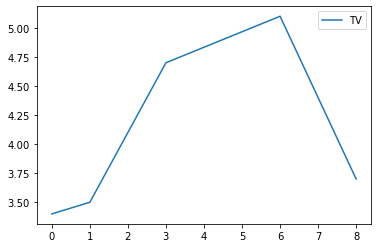

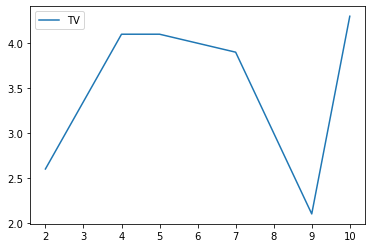

In [136]:
# Graficamos los datos
grouped.plot()

In [137]:
# Separamos los grupos como DataFrames
df_female = grouped.get_group('f')
df_female

,Gender,TV
0,f,3.4
1,f,3.5
3,f,4.7
6,f,5.1
8,f,3.7


In [138]:
# Obtenemos los datos como un numpy-array
values_female = df_female.values
values_female

array([['f', 3.4],
       ['f', 3.5],
       ['f', 4.7],
       ['f', 5.1],
       ['f', 3.7]], dtype=object)

### Merge

In [139]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [140]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [141]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


In [142]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [143]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [144]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


Tipos de *join*

<img src="images/im2.png" width="700" height="300">

In [145]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [146]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [147]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [148]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [149]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [150]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [151]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


### Datos categóricos

In [152]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [153]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): ['A', 'A+', 'A-', 'B', ..., 'C+', 'C-', 'D', 'D+']

In [158]:
grades = pd.Categorical(df.Grades, categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                              ordered=True)
grades

['A+', 'A', 'A-', 'B+', 'B', ..., 'C+', 'C', 'C-', 'D+', 'D']
Length: 11
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

In [159]:
grades > 'C'

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False])

In [160]:
#import os as os
#os.chdir("C:/Users/VICTOR/Documents/AnalyticsPython/Data")
df = pd.read_csv('Data/census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg([np.average]).rename(columns={'average': 'avg'})
pd.cut(df['avg'],10)


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

### Tablas dinámicas

In [161]:
df = pd.read_csv('Data/cars.csv')

In [162]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [163]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [164]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35